In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
foam = pd.read_csv('flights-clean.csv')
foam.head()



,airline,orignum,deptime,depdelay,arrdelay,cancelled,distance
0,19805.0,74.0,854.0,0.0,2.0,0.0,2475.0
1,19805.0,76.0,944.0,14.0,0.0,0.0,2475.0
2,19805.0,74.0,1224.0,0.0,39.0,0.0,2475.0
3,19805.0,76.0,1240.0,25.0,0.0,0.0,2475.0
4,19805.0,68.0,1300.0,0.0,15.0,0.0,3784.0


In [2]:
X = foam[["orignum", "deptime"]]
y = foam["depdelay"].values.reshape(-1, 1)
print(X.shape, y.shape)

(483499, 2) (483499, 1)


In [3]:
# Generate 4 clusters of random data.
from sklearn.datasets.samples_generator import make_blobs

#data, _ = make_blobs(n_samples=300, centers=4,
#                     cluster_std=0.60, random_state=0)
X=X.values
X


array([[  74.,  854.],
       [  76.,  944.],
       [  74., 1224.],
       ...,
       [  83., 1801.],
       [  83., 1037.],
       [  83.,  557.]])

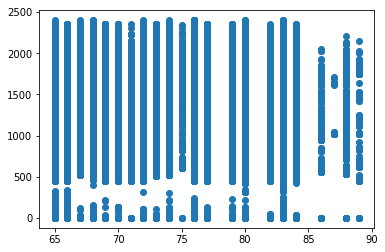

In [4]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1])

In [11]:
# Use n_clusters=4 as the k value
# We can see from the plot above that there are 4 clusters
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
kmeans.fit(X_train)
kmeans.fit(X_test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
# Fit the model to the data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
# Predict the clusters
predicted_clusters = kmeans.predict(X)

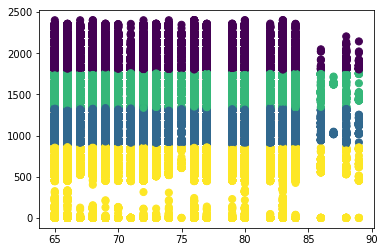

In [14]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=50, cmap='viridis')

In [15]:
print(f"Training Data Score: {kmeans.score(X_train, y_train)}")
print(f"Testing Data Score: {kmeans.score(X_test, y_test)}")

Training Data Score: -8017783793.034017
Testing Data Score: -2672817597.142173
